In [1]:
from keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (驗證圖片, 驗證答案))
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.
C:\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


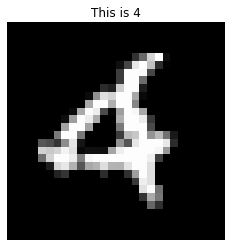

In [3]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 59999)
plt.title("This is " + str(y_train[c]))
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [4]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,211,255,14,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,193,44,3,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,70,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# 圖片調整: (0~1) /255 -> tesorflow weights, reshape -> mlp只吃一維
x_train_reshape = x_train.reshape(60000, 784) / 255
x_test_reshape = x_test.reshape(10000, 784) / 255

In [6]:
# 答案調整: One-hot Encoding: 10個機率
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("Before:", y_train[0])
print("After:", y_train_cat[0])

Before: 5
After: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
mlp.add(Dense(256, activation="relu", input_dim=784))
mlp.add(Dense(10, activation="softmax"))
mlp.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [8]:
mlp.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])


Instructions for updating:
keep_dims is deprecated, use keepdims instead



In [9]:
#batck_size: 看了幾筆資料才做一次調整(梯度下降)(更新參數)
#資料不大: 100~200  資料很大: 10~20
#epochs:整份資料要翻幾遍, 控制擬和程度
#val_loss: 平滑就該停下來
#validation_split: 驗證模型好不好, 要用沒看過的資料(0.1意思是切10%不做訓練)
#verbose: 印出多少log(1: 最詳細 2: 必要的 0: 無)
#做10個epochs * 54000(訓練資料) / 200(筆調整一次) = 2700(調整)
mlp.fit(x_train_reshape, y_train_cat,
       batch_size=200, epochs=10,
       validation_split=0.1, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
3s - loss: 0.3721 - acc: 0.8963 - val_loss: 0.1613 - val_acc: 0.9568
Epoch 2/10
2s - loss: 0.1660 - acc: 0.9528 - val_loss: 0.1130 - val_acc: 0.9697
Epoch 3/10
2s - loss: 0.1157 - acc: 0.9671 - val_loss: 0.0907 - val_acc: 0.9757
Epoch 4/10
2s - loss: 0.0880 - acc: 0.9741 - val_loss: 0.0831 - val_acc: 0.9768
Epoch 5/10
2s - loss: 0.0686 - acc: 0.9806 - val_loss: 0.0742 - val_acc: 0.9792
Epoch 6/10
2s - loss: 0.0561 - acc: 0.9841 - val_loss: 0.0735 - val_acc: 0.9788
Epoch 7/10
2s - loss: 0.0452 - acc: 0.9880 - val_loss: 0.0732 - val_acc: 0.9778
Epoch 8/10
2s - loss: 0.0386 - acc: 0.9892 - val_loss: 0.0665 - val_acc: 0.9787
Epoch 9/10
2s - loss: 0.0312 - acc: 0.9917 - val_loss: 0.0729 - val_acc: 0.9808
Epoch 10/10
2s - l

In [10]:
mlp.evaluate(x_test_reshape, y_test_cat)

 9824/10000 [============================>.] - ETA: 0s

[0.07412856029607355, 0.9777]

In [11]:
from sklearn.metrics import confusion_matrix
pre = mlp.predict_classes(x_test_reshape)
label = list(range(0,10))
c = [str(l) + "(預測)" for l in label]
i = [str(l) + "(正確)" for l in label]
pd.DataFrame(confusion_matrix(y_test, pre),
             columns=c,
             index=i)

 9408/10000 [===========================>..] - ETA: 0s

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),973,0,1,0,0,0,2,1,3,0
1(正確),0,1122,3,1,0,1,2,2,4,0
2(正確),6,1,1004,2,1,0,2,6,10,0
3(正確),0,0,2,986,0,5,0,5,8,4
4(正確),1,0,4,1,965,0,3,5,1,2
5(正確),2,0,1,4,1,877,3,2,2,0
6(正確),6,2,2,1,2,3,939,0,3,0
7(正確),1,2,7,1,0,0,0,1012,3,2
8(正確),4,0,1,7,4,4,1,6,944,3
9(正確),4,4,0,9,14,3,1,12,7,955


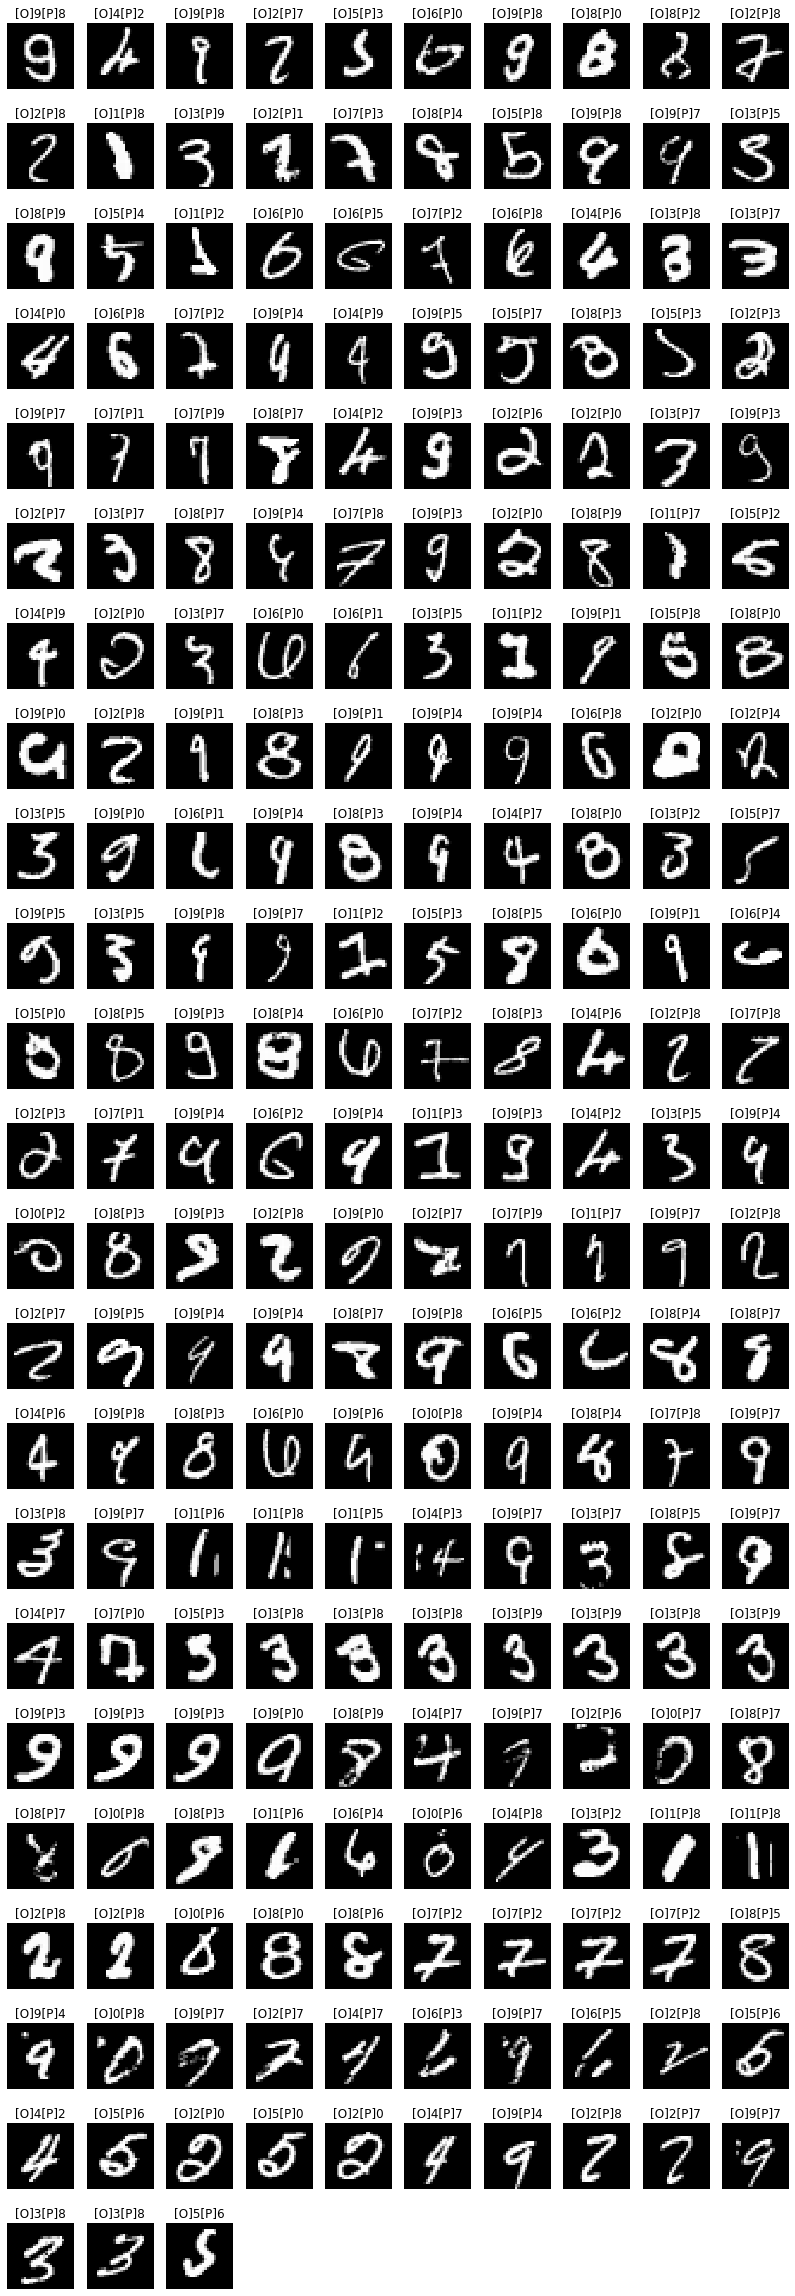

In [12]:
#SHOW出第幾張圖是錯誤的
import numpy as np
idx = np.nonzero(pre != y_test)[0]
false_img = x_test[idx]
false_answer = y_test[idx]
false_pre = pre[idx]

width = 10
height = len(false_img) // width + 1
plt.figure(figsize=(14, 42))
for i, img in enumerate(false_img):
    plt.subplot(height, width, i + 1)
    t = "[O]" + str(false_answer[i]) + "[P]" + str(false_pre[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

In [ ]:
from keras.preprocessing.image import load_img
fp = input("請輸入你要檢測的圖")
img = load_img(fp, target_size=(28, 28)).convert("L")
img_np = np.array(img)
img_np_norm = img_np / 255
img_np_norm = img_np_norm.reshape(1, 784)
print("應該是:", mlp.predict_classes(img_np_norm)[0])
plt.imshow(img_np, cmap="gray")